<a href="https://colab.research.google.com/github/Euan-J-Austin/Data_Analytics_and_Intelligence/blob/main/MULTILINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OVERVIEW

In [1]:
# MOUNT

%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/.shortcut-targets-by-id/19DFaxKzsTyJQzT1s4FwLYh5D9XB9MI1N/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [2]:
# LIBRARIES

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [3]:
# DATA

df = pd.read_csv('salaries.csv')

# DATA ANALYSIS

In [11]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


## OUTLIERS

WHICH OBSERVATIONS ARE NOISE AND WHICH ARE VALUABLE INFORMATION?

SOME MODELS ARE GOOD WITH OUTLIERS OR NON-LINEARITY E.G. RANDOM FOREST

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


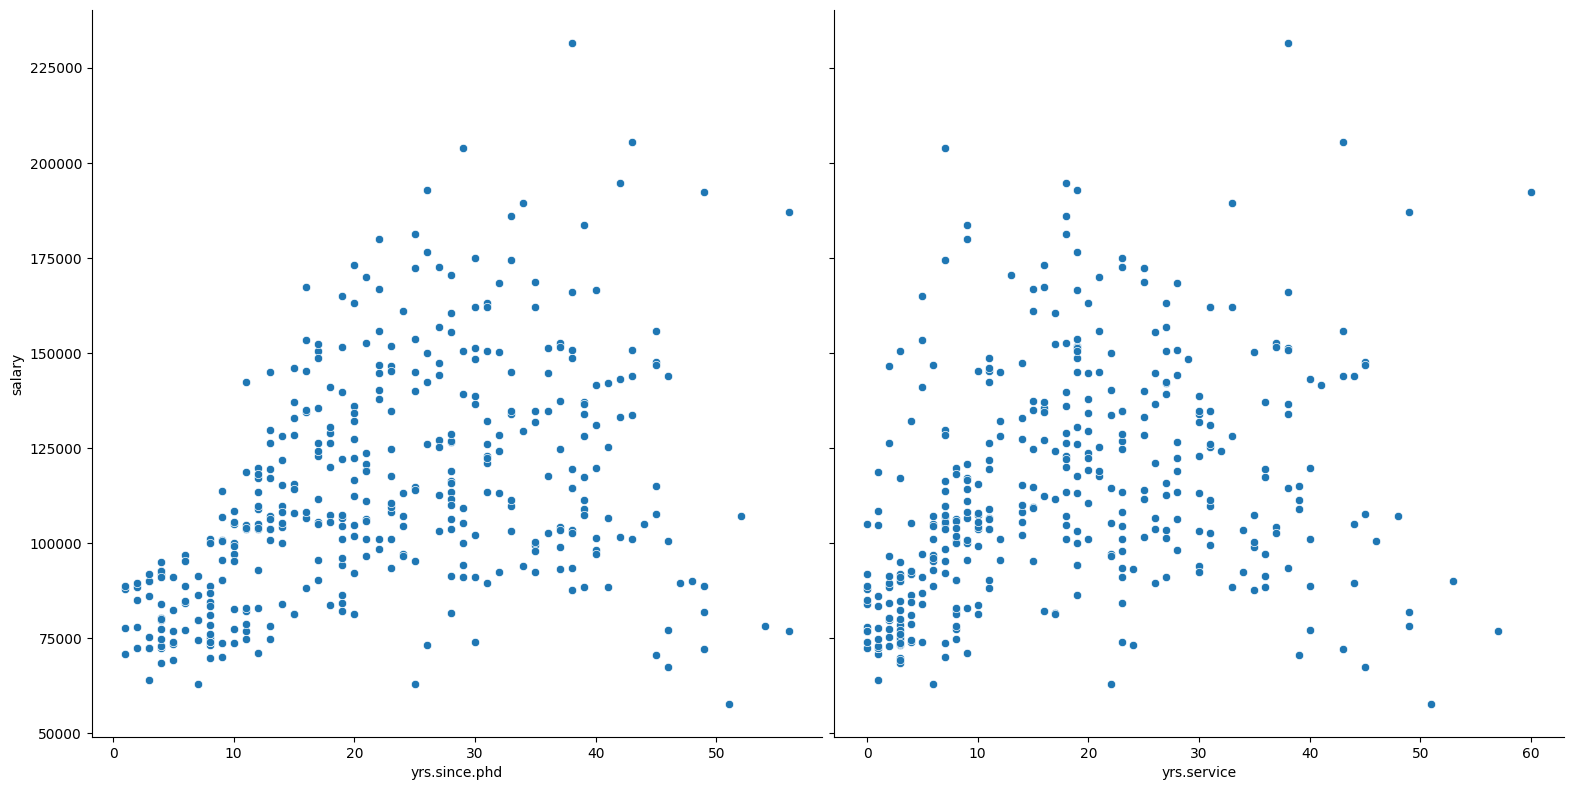

In [21]:
# VISUALISING CONTINUOUS INDEPENDENT VARIABLE AGAINST DEPENDENT VARIABLE

sns.pairplot(data = df,
             x_vars = ['yrs.since.phd', 'yrs.service'],
             y_vars = ['salary'],
             size = 8)

<ipython-input-4-a43df171f329>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

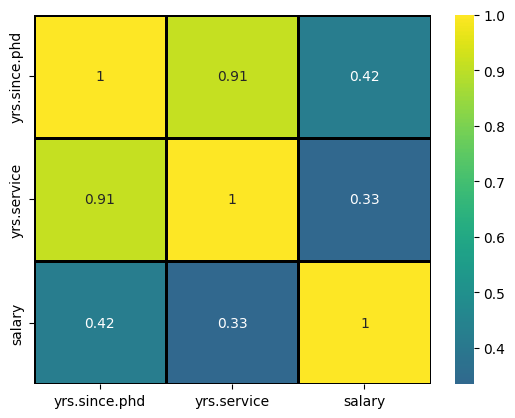

In [4]:
# CORRELATION MATRIX

sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2g',
            center = 0.5,
            cmap = 'viridis',
            linewidths = 1,
            linecolor = 'black')

We see that there is strong multi-colinearity between the 'yrs.service' and 'yrs.since.phd' so we drop 'yrs.service' as it's correlation with salary is weaker.

# CATEGORICAL VARIABLES

In [5]:
# CATEGORICAL VARIABLES

df.select_dtypes(include = 'object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [6]:
#FOR LOOP

categorical = list(df.select_dtypes(include = 'object'))


for c in categorical:
  print(df[c].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


## DROPPING DUMMIES

In [7]:
# TRANSFORM OBJECTS INTO DUMMIES

df = pd.get_dummies(data=df, drop_first=True)

In [9]:
df.head()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1


# PREPARING MULTILINEAR REGRESSION

In [11]:
df.columns

Index(['yrs.since.phd', 'yrs.service', 'salary', 'rank_AsstProf', 'rank_Prof',
       'discipline_B', 'sex_Male'],
      dtype='object')

In [ ]:
# ISOLATE Y AND X

y = df.salary / 1000 # divide by 1,000 to make co-efficients readily understandable
x = df.drop(columns = ['salary', 'yrs.service']) #dropped 'yrs.service' as multicollinear with yrs.since.phd and lower correlation with salary


In [ ]:
# ADD CONSTANT

X = sm.add_constant(x)
X

# OVERFITTING AND UNDERFITTING

OVER- AND UNDER-FITTED MODELS DO NOT PREDICT WILL FOR TEST DATA

# TRAIN AND TEST DATA

TRAIN DATA TO CREATE MODEL

TEST DATA TO ASSESS MODEL

# PREPARING MULTILINEAR REGRESSION (CONT.)

In [15]:
from sklearn.model_selection import train_test_split as tts

In [16]:
X_train, X_test, y_train, y_test = tts(X, y,
                                       test_size = 0.2,
                                       random_state=1502)

X_train.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,0,1,0,1
287,1.0,2,1,0,0,1
326,1.0,23,0,1,1,1
15,1.0,12,0,1,1,1
354,1.0,8,1,0,1,1


# MULTILINEAR REGRESSION MODEL

In [20]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.65e-41
Time:                        22:02:28   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

# ACCURACY KPIs

MAE AND RSME ARE PERFORAMNCE INDICATORS FOR REGRESSION MODELS WITH CONTINUOUS DEPENDENT VARIABLES

MEAN ABSOLUTE ERROR (MAE) ... MAE = SIGMA | Y - Y-HAT | / N

ROOT SQUARED MEAN ERROR (RSME) ... RSME = SQRT(SIGMA (Y-HAT - Y)^2 /n)

RSME IS BEST FOR MODELS WITH OUTLIERS OR EXTREME VALUES.

# MODEL PREDICTIONS

In [ ]:
predictions = model.predict(X_test)
predictions[:4]

# ACCURACY ASSESSMENT

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE: {round(mean_absolute_error(y_test, predictions)*1000, 2)}')
print(f'RSME: {round(np.sqrt(mean_squared_error(y_test, predictions)), 2)*1000}')

MAE: 18221.4
RSME: 25820.0
